In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [47]:
class Person():

    def __init__(self, num_of_issues, opinions=None, weights=None):

        self.p = pd.DataFrame()
        self.total_issues = num_of_issues
        self.p.index = range(num_of_issues)
        self.p.index.name = 'Issues'

        rng = np.random.default_rng()

        if opinions is None:
            self.p['Opinion'] = [rng.normal(0,1) for _ in range(num_of_issues)]
        else: 
            self.p['Opinion'] = opinions

        if weights is None:
            self.p['Weight'] = [rng.normal(0,1)**2 for _ in range(num_of_issues)]
        else:
            self.p['Weight'] = weights


        self.p['Rhetoric'] = np.zeros(self.total_issues)


    def become_vocal(self, vocality=0.25, num_of_issues=None):

        if num_of_issues is None:
            num_of_issues = int(self.total_issues*vocality)
        else:
            num_of_issues = min(num_of_issues, self.total_issues)

        sorted_issues = np.argsort(self.p['Weight'].to_numpy())[::-1][:num_of_issues]

        for issue in sorted_issues:
            issue = int(issue)
            self.p.loc[issue, 'Rhetoric'] = self.p.loc[issue, 'Weight']

    def return_frame(self):
        return self.p
    
    def evaluate_canidates(self, canidates):

        distances_per_canidate = []
        for canidate in canidates:
            agreement_per_issue = []
            for issue in self.p.index:
                opinion_distance = np.abs(self.p.loc[issue, 'Opinion'] - canidate.p.loc[issue, 'Opinion'])
                conviction_distance = np.abs(self.p.loc[issue, 'Weight'] - canidate.p.loc[issue, 'Weight'])
                opinion_power = 1 + (1 / (1 + np.abs(self.p.loc[issue, 'Opinion'] - canidate.p.loc[issue, 'Opinion'])))**10
                conviction_power = 1 + np.sqrt(self.p.loc[issue, 'Weight'] * canidate.p.loc[issue, 'Weight'])

                agreement = -np.log((opinion_distance**conviction_power)*(opinion_power**conviction_distance))

                agreement_per_issue.append(agreement)

            distances_per_canidate.append(sum(agreement_per_issue))

        return distances_per_canidate
    



    def __str__(self) -> str:
        return str(self.p)
    
    
    def influence_others(self, people, influence_matrix, influence_function):
        '''
        influence_matrix is a n x m matrix
        where n is number of people
        and m is number of issues
        
        '''
        for i, person in enumerate(people):
            influence_function(self, person, influence_matrix[i])
        pass


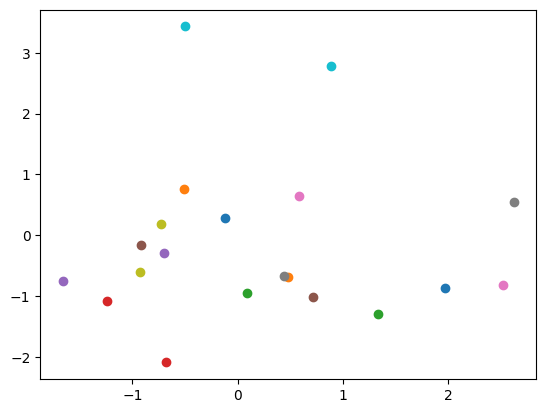

In [48]:
people = []
canidates = []

for i in range(20):
    p = Person(2)
    people.append(p)

    if i%10 == 0:
        c = Person(2)
        canidates.append(c)
        
    
fig, ax = plt.subplots()

for person in people:
    ax.scatter([person.p.loc[0, 'Opinion']],[person.p.loc[1, 'Opinion']])
    nearest = person.evaluate_canidates(canidates)
    ax.plot([person.p.loc[0, 'Opinion']])

plt.show()
    


In [33]:
for i, (voter_op, voter_weight, canidate_op, canidate_weight) in enumerate(itertools.product([-1], [5, 0.1], [0.9, -0.9], [5, 0.1])):

    print(f"{i+1}\tAgree: {'Yes' if voter_op-canidate_op > -1 else 'No'}\tVoter Conviction: {voter_weight}\tCanidate Conviction: {canidate_weight}")

    person = Person(1, opinions=[voter_op], weights=[voter_weight])
    #print(person)
    canidate = Person(1, opinions=[canidate_op], weights=[canidate_weight])
    #print(person)
    print(person.evaluate_canidates([canidate]))

    print('\n')
    



1	Agree: No	Voter Conviction: 5	Canidate Conviction: 5
[np.float64(-3.8511233170343684)]


2	Agree: No	Voter Conviction: 5	Canidate Conviction: 0.1
[np.float64(-1.095829590774854)]


3	Agree: Yes	Voter Conviction: 5	Canidate Conviction: 5
[np.float64(13.815510557964275)]


4	Agree: Yes	Voter Conviction: 5	Canidate Conviction: 0.1
[np.float64(2.3329062121603696)]


5	Agree: No	Voter Conviction: 0.1	Canidate Conviction: 5
[np.float64(-1.095829590774854)]


6	Agree: No	Voter Conviction: 0.1	Canidate Conviction: 0.1
[np.float64(-0.7060392747896344)]


7	Agree: Yes	Voter Conviction: 0.1	Canidate Conviction: 5
[np.float64(2.3329062121603696)]


8	Agree: Yes	Voter Conviction: 0.1	Canidate Conviction: 0.1
[np.float64(2.532843602293451)]




In [25]:
np.log(3.01)

np.float64(1.1019400787607843)

In [104]:
0.1**1.5

0.0316227766016838

In [ ]:
issues = []*10
for i in range(len(issues)):